# Laboratorio 4 
## Nombre: Alejandro Jesús Manotas Marmolejo

## Código: 200108289


---



# 1. Monte Carlo Simulations

---



In [2]:
#Imports
import numpy as np
from scipy.stats import uniform
import matplotlib.pyplot as plt
import random

%matplotlib inline
plt.rcParams['figure.figsize'] = (17.0, 4.0)

In [3]:
#Random launches between 1 and 100
def launch():
    choose = random.randint(0,1) #Number that the player chooses, 0 = player chooses even number, 1 = player chooses odd number
    num = random.randint(1,100) #Number picked from the bag
    even = [45, 47, 49, 51, 53, 55]
    odd = [46, 48, 50, 52, 54]
    if choose == 0 and num in even:
      return True
    elif choose == 1 and num in odd:
      return True
    elif choose == 0 and num % 2 == 0 and num not in odd:
      return True
    elif choose == 1 and num % 2 != 0 and num not in even:
      return True
    else:
      return False

In [4]:
#x= Numbers of bets in a simulation, money= Money to start with, bet_mount = What is gained/lost, mounts = Stores all the amounts that are being taken by simulation
def bet(x,money,bet_mount,mounts):
    temp = money
    for i in range(x):
        if launch():
            temp += bet_mount
        else:
            temp -= bet_mount
    mounts.append(temp)
    return mounts

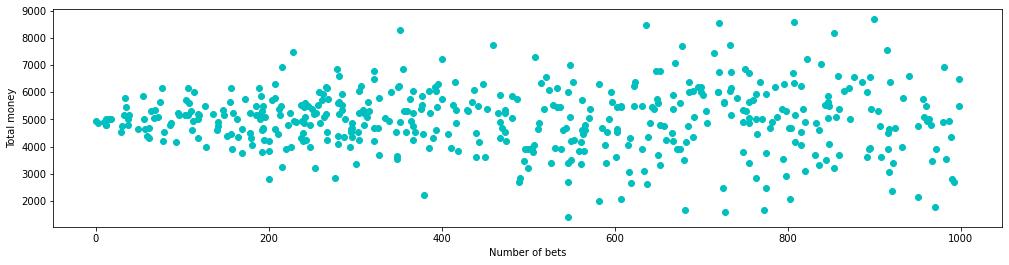

In [6]:
n_attempts = random.randint(0,1000) #Number of bets
mounts = []
attempts_simulations = [] #Number of simulations in a bet


for i in range(n_attempts):
  attempts_simulations.append(random.randint(0,1000))

#Calling bet function
for i in attempts_simulations:
   bet(i,5000,50,mounts)


#Graph of the number of bets vs. total money
fig,ax = plt.subplots(1,1)
ax.set_xlabel("Number of bets")
ax.set_ylabel("Total money")
ax.plot(attempts_simulations, mounts,'co')
plt.show()

De la gráfica podemos concluir que el jugador son pocas las veces que llega a perder todo el dinero así como también pocas las veces en las que llega a tener mucho más que con lo que empezó, en la mayoría de simulaciones siempre se encuentra en un rango entre 3500 y 6000 aproximadamente.

# 2. Markov Chains

---



In [7]:
#Import libraries
import numpy as np
import random as rm
import pandas as pd
from matplotlib import pyplot as plt

In [8]:
#The state space
states = ["NET", "DIS", "HBO", "HUL"]

#PTM
P = [[0.25, 0.25, 0.25,0.25], 
     [0.3, 0.4, 0.1,0.2], 
     [0.5, 0.2, 0.1,0.2],
     [0.3,0.15,0.3,0.25]]

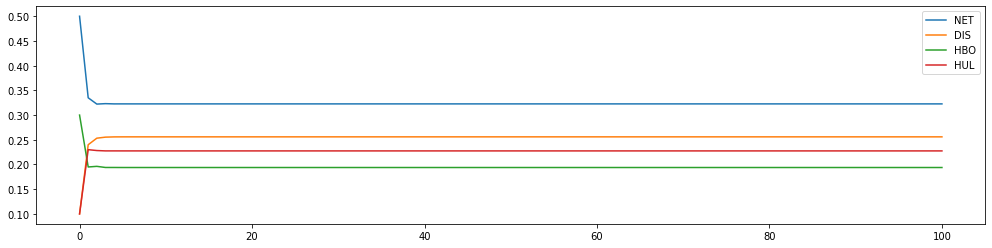

In [9]:
state = np.array([[0.5, 0.1, 0.3, 0.1]])
stateHist = state
dfStateHist = pd.DataFrame(state)

for x in range(100):
  state = np.dot(state, P)
  stateHist = np.append(stateHist, state, axis=0)

dfDiststrHist = pd.DataFrame(stateHist, columns=states)
dfDiststrHist.plot()
plt.show()

# 3. Markov Chains

---



In [10]:
#Imports
import numpy as np
import random as rm

In [11]:
#The states
states = ["Thank","you","for","your","help","all","assistance","everything","end"]

#States that may appear
#TY = Thank you, YF = You for, YE = You end, FY = For your, FA = For all, FE = For everyhing
#YH = Your help, YA = Your asssistance, HE = Help end, AY = All your
#AE = Assistance end, EE = Everything end
transitionName = [['','TY','','','','','','',''], ['','','YF','','','','','','YE'], ['','','','FY','','FA','','FE',''],
                  ['','','','','YH','','YA','',''], ['','','','','','','','','HE'], ['','','','AY','','','','',''],
                  ['','','','','','','','','AE'], ['','','','','','','','','EE'], ['','','','','','','','','EE']]

#Probability of the states
transitionMatrix =  [[0,1,0,0,0,0,0,0,0],
                    [0,0,0.8,0,0,0,0,0,0.2],
                    [0,0,0,0.5,0,0.25,0,0.25,0],
                    [0,0,0,0,0.66,0,0.34,0,0],
                    [0,0,0,0,0,0,0,0,1],
                    [0,0,0,1,0,0,0,0,0],
                    [0,0,0,0,0,0,0,0,1],
                    [0,0,0,0,0,0,0,0,1],
                    [0,0,0,0,0,0,0,0,1]]

#Validate that the matrix is well defined.
total = 0
for i in range(9):
  total += sum(transitionMatrix[i])

if total != 9:
  print("Error in transition matrix")
else: 
  print("Transition matrix: ok")

Transition matrix: ok


In [12]:
def sentences():
  word = "Thank"
  word_list = [word]
  while word != "end":
    if word == "Thank":
      change = np.random.choice(transitionName[0],replace=True,p=transitionMatrix[0])
      if change == "TY":
          word = "you"
          word_list.append("you")
          continue
    elif word == "you":
      change = np.random.choice(transitionName[1],replace=True,p=transitionMatrix[1])
      if change == "YF":
        word = "for"
        word_list.append("for")
        continue
      elif change == "YE":
        word = "end" 
        word_list.append("end")
    elif word == "for":
      change = np.random.choice(transitionName[2],replace=True,p=transitionMatrix[2])
      if change == "FY":
        word = "your"
        word_list.append("your")
        continue
      elif change == "FA":
        word = "all"
        word_list.append("all")
      elif change == "FE":
        word = "everything"
        word_list.append("everything")
    elif word == "your":
      change = np.random.choice(transitionName[3],replace=True,p=transitionMatrix[3])
      if change == "YH":
        word = "help"
        word_list.append("help")
        continue
      elif change == "YA":
        word = "assistance"
        word_list.append("assistance")
    elif word == "help":
      change = np.random.choice(transitionName[4],replace=True,p=transitionMatrix[4])
      if change == "HE":
        word = "end"
        word_list.append("end")
        continue
    elif word == "all":
      change = np.random.choice(transitionName[5],replace=True,p=transitionMatrix[5])
      if change == "AY":
        word = "your"
        word_list.append("your")
        continue
    elif word == "assistance":
      change = np.random.choice(transitionName[6],replace=True,p=transitionMatrix[6])
      if change == "AE":
        word = "end"
        word_list.append("end")
        continue
    elif word == "everything":
      change = np.random.choice(transitionName[7],replace=True,p=transitionMatrix[7])
      if change == "EE":
        word = "end"
        word_list.append("end")
        continue
    elif word == "end":
      change = np.random.choice(transitionName[8],replace=True,p=transitionMatrix[8])
      if change == "EE":
        word = "end"
        word_list.append("end")
        continue
  return word_list

sentences()

['Thank', 'you', 'for', 'everything', 'end']

In [13]:
#Sentences list
count = 0
sentences_list = []
times = 100000

#We get all sentences after calling n - times the function
for iterations in range(1,times):
        sentences_list.append(sentences())
        
#We get the ones starting with "thank" and the penultimate is "you"
for smaller_list in sentences_list:
    if smaller_list[0] == "Thank" and smaller_list[-2] == "you":
        count += 1

print((count/times) * 100)

19.858


Probability of "Thank you" is 19.858%

# 4. MCMC

---



## $f(x) = \frac{1}{1+e^{\beta t + \alpha}}$

In [14]:
#Imports
import random
import math
import numpy as np
import pylab as pl
import pandas as pd
import scipy.special as ss
from scipy.stats import gamma

%matplotlib inline
pl.rcParams['figure.figsize'] = (17.0, 4.0)

In [15]:
#Gamma function
def gamma_s(t, b, a):
  return 1 / (1 + math.e**(b*t + a))

In [16]:
# This Function returns True if the coin with probability P of heads comes heads when flipped.
def random_coin(p):
  unif = random.uniform(0,1)
  if unif >= p:
    return False
  else:
    return True

In [17]:
# This Function runs the MCMC chain for Gamma Distribution.
def gamma_mcmc(N_hops, a, b):
  states = []
  cur = random.uniform(0,1)
  for i in range(N_hops):
    states.append(cur)
    next = random.uniform(0,1)
    ap = min(gamma_s(next,a,b)/gamma_s(cur,a,b),1)
    if random_coin(ap):
      cur = next
  return states[-1000:] # Returns the last 100 states of the chain

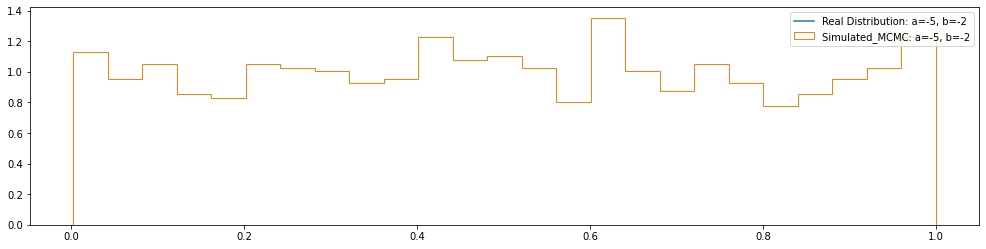

In [18]:
# Create a function to plot Actual Gamma PDF with the Gamma Sampled from MCMC Chain.
def plot_gamma(a, b):
  Ly = []
  Lx = []
  i_list = np.mgrid[0:1:100j]
  for i in i_list:
    Lx.append(i)
    Ly.append(gamma.pdf(i, a, b))
      
  pl.plot(Lx, Ly, label="Real Distribution: a="+str(a)+", b="+str(b))
  pl.hist(gamma_mcmc(10000, a, b), density=True,bins =25, histtype='step',label="Simulated_MCMC: a="+str(a)+", b="+str(b))
  pl.legend()
  pl.show()
  
# Alpha = -5, beta = -2 
plot_gamma(-5,-2)

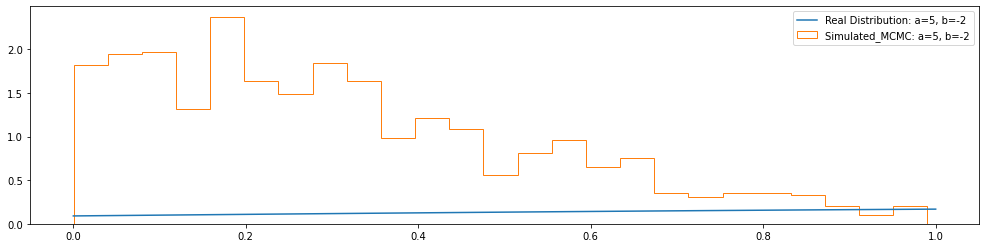

In [19]:
# Alpha = 5, beta = -2
plot_gamma(5,-2)